## Analyse Shopping Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Importing Data

In [2]:
# path = '/kaggle/input/shoppersentiments/TeePublic_review.csv'
df = pd.read_csv("Data.csv", encoding='latin-1')
df.head()

,ï»¿reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadÃ¯Â¿Â½Ã¯Â¿...,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerÃ¯Â¿Â½Ã¯Â¿Â½...,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyÃ¯Â¿Â½Ã¯Â¿Â½Ã...,My order arrived in a good timely fashion & th...,4


In [3]:
df[['title']].head(4)

,title
0,Great help with lost order
1,I ordered the wrong size tee and hadÃ¯Â¿Â½Ã¯Â¿...
2,These guys offer the best customerÃ¯Â¿Â½Ã¯Â¿Â½...
3,Good Stuff


In [4]:
(df[['title']].isnull().sum())
(df[['review']].isnull().sum())

review    30503
dtype: int64

In [5]:
(df[['review-label']].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
review-label,278100.0,4.40973,1.178112,1.0,4.0,5.0,5.0,5.0


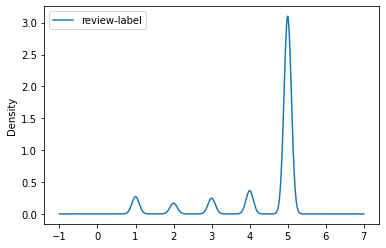

In [6]:
(df[['review-label']].plot(kind='kde'));

## EDA

In [7]:
col_selection = ['title', 'review-label']

In [8]:
df[col_selection].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         278091 non-null  object
 1   review-label  278100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [9]:
(df[col_selection].dropna().isnull().sum())
(df[col_selection].isnull().sum())
(df[col_selection].head(25))

,title,review-label
0,Great help with lost order,5
1,I ordered the wrong size tee and hadÃ¯Â¿Â½Ã¯Â¿...,5
2,These guys offer the best customerÃ¯Â¿Â½Ã¯Â¿Â½...,5
3,Good Stuff,5
4,My order arrived in a good timelyÃ¯Â¿Â½Ã¯Â¿Â½Ã...,4
5,Always top notch,5
6,Recent review,4
7,Great communication,5
8,Awesome,5
9,Wonderful quality T-shirts for anÃ¯Â¿Â½Ã¯Â¿Â½Ã...,5


In [10]:
(df[col_selection].dropna().assign(title = df.title.str.replace('ï¿½', '')).head(10))

,title,review-label
0,Great help with lost order,5
1,I ordered the wrong size tee and hadÃ¯Â¿Â½Ã¯Â¿...,5
2,These guys offer the best customerÃ¯Â¿Â½Ã¯Â¿Â½...,5
3,Good Stuff,5
4,My order arrived in a good timelyÃ¯Â¿Â½Ã¯Â¿Â½Ã...,4
5,Always top notch,5
6,Recent review,4
7,Great communication,5
8,Awesome,5
9,Wonderful quality T-shirts for anÃ¯Â¿Â½Ã¯Â¿Â½Ã...,5


In [11]:
def new_feature(x):
    if x < 4:
        return 'bad experience'
    else:
        return 'happy'

In [12]:
(df[col_selection].dropna().assign(title = df.title.str.replace('ï¿½', ''),label = df['review-label'].apply(new_feature)).head(10))

,title,review-label,label
0,Great help with lost order,5,happy
1,I ordered the wrong size tee and hadÃ¯Â¿Â½Ã¯Â¿...,5,happy
2,These guys offer the best customerÃ¯Â¿Â½Ã¯Â¿Â½...,5,happy
3,Good Stuff,5,happy
4,My order arrived in a good timelyÃ¯Â¿Â½Ã¯Â¿Â½Ã...,4,happy
5,Always top notch,5,happy
6,Recent review,4,happy
7,Great communication,5,happy
8,Awesome,5,happy
9,Wonderful quality T-shirts for anÃ¯Â¿Â½Ã¯Â¿Â½Ã...,5,happy


In [13]:
def transformed_data(data):
    col_selection = ['title', 'review-label']
    return (df[col_selection].dropna().assign(title = df.title.str.replace('ï¿½', ''),
                            label = df['review-label'].apply(new_feature)))

## Visualisation

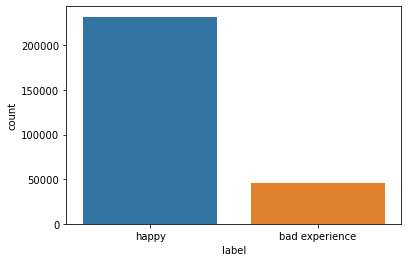

In [14]:
df_transformed = transformed_data(df)
sns.countplot(data=df_transformed, x = 'label');

## Modeling

In [15]:
X = df_transformed.title
y = df_transformed.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [17]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
def report(model):
        preds = model.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
        print(classification_report(y_test, preds))

In [19]:
lvc = LinearSVC(max_iter=1000)
report(lvc)

                precision    recall  f1-score   support

bad experience       0.77      0.56      0.65      9187
         happy       0.92      0.97      0.94     46432

      accuracy                           0.90     55619
     macro avg       0.84      0.76      0.80     55619
  weighted avg       0.89      0.90      0.89     55619



In [20]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('svc', LinearSVC())])

pipe.fit(X, y)
data = pipe.predict(X)
data = pd.DataFrame(data)

In [21]:
df_transformed['predictions'] = data
df_transformed.sample(10)

,title,review-label,label,predictions
105439,The Belmont coffee cup had the logoÃ¯Â¿Â½Ã¯Â¿Â...,4,happy,happy
33795,Amazing quality and shipped on time!!,5,happy,happy
174217,The graphics are great,4,happy,happy
160822,Received t shirt quickly,5,happy,happy
217630,My button was great,4,happy,happy
71082,Shirt fits great,5,happy,happy
66252,Great customer service,5,happy,happy
272115,"Great shirts, great people!",5,happy,happy
88358,AWESOME,5,happy,happy
114697,Received shirts,5,happy,bad experience
